# Customer Service Request Analysis

Background of Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

Import a 311 NYC service request.

Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)

Are the type of complaint or service requested and location related?

In [32]:
# Importing the libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Import a 311 NYC service request.

In [33]:
data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
data.head(3)

H:\New folder\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

In [34]:
data["Created Date"] = pd.to_datetime(data["Created Date"])

In [35]:
data["Closed Date"] = pd.to_datetime(data["Closed Date"])

In [36]:
data["Request_Closing_Time"] = data["Created Date"] - data["Closed Date"]

In [37]:
data[["Created Date","Closed Date","Request_Closing_Time"]].head()

,Created Date,Closed Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,-1 days +23:04:45
1,2015-12-31 23:59:44,2016-01-01 01:26:00,-1 days +22:33:44
2,2015-12-31 23:59:29,2016-01-01 04:51:00,-1 days +19:08:29
3,2015-12-31 23:57:46,2016-01-01 07:43:00,-1 days +16:14:46
4,2015-12-31 23:56:58,2016-01-01 03:24:00,-1 days +20:32:58


3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [38]:
data.isnull().sum().to_frame()

,0
Unique Key,0
Created Date,0
Closed Date,2164
Agency,0
Agency Name,0
Complaint Type,0
Descriptor,5914
Location Type,131
Incident Zip,2615
Incident Address,44410


In [39]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [40]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",-1 days +23:04:45
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",-1 days +22:33:44
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",-1 days +19:08:29
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",-1 days +16:14:46
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",-1 days +20:32:58


<AxesSubplot:>

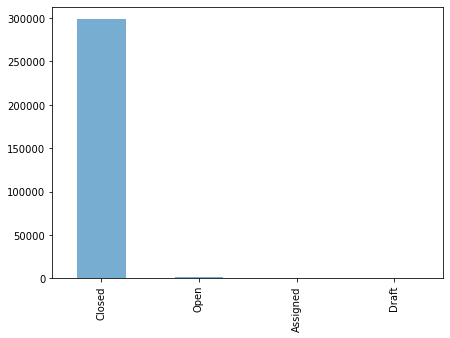

In [41]:
data["Status"].value_counts().plot(kind="bar",figsize=(7,5),alpha=0.6)

<AxesSubplot:>

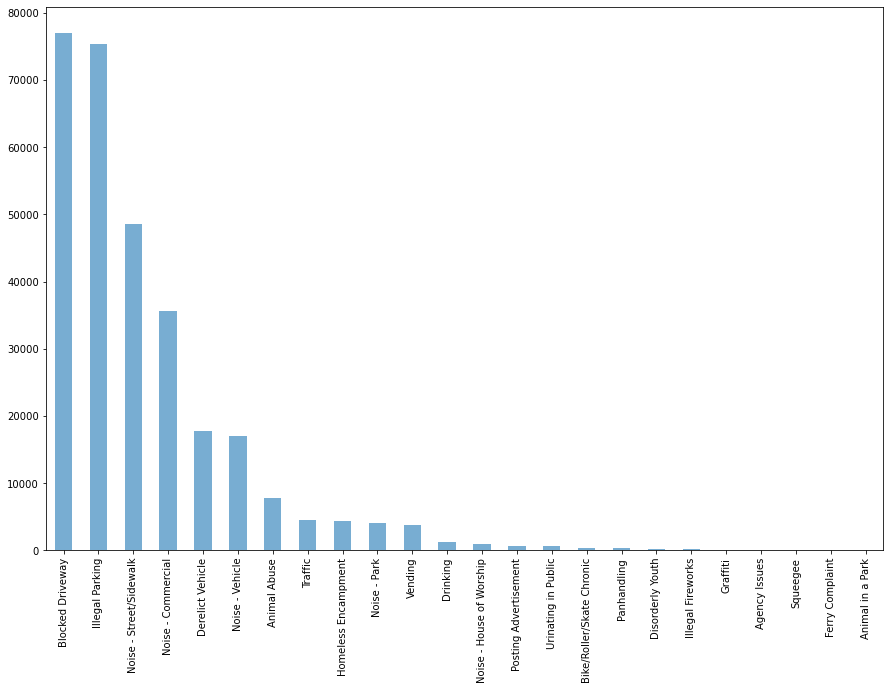

In [44]:
data["Complaint Type"].value_counts().plot(kind="bar",figsize=(15,10),alpha=0.6)

City with Highest complaints

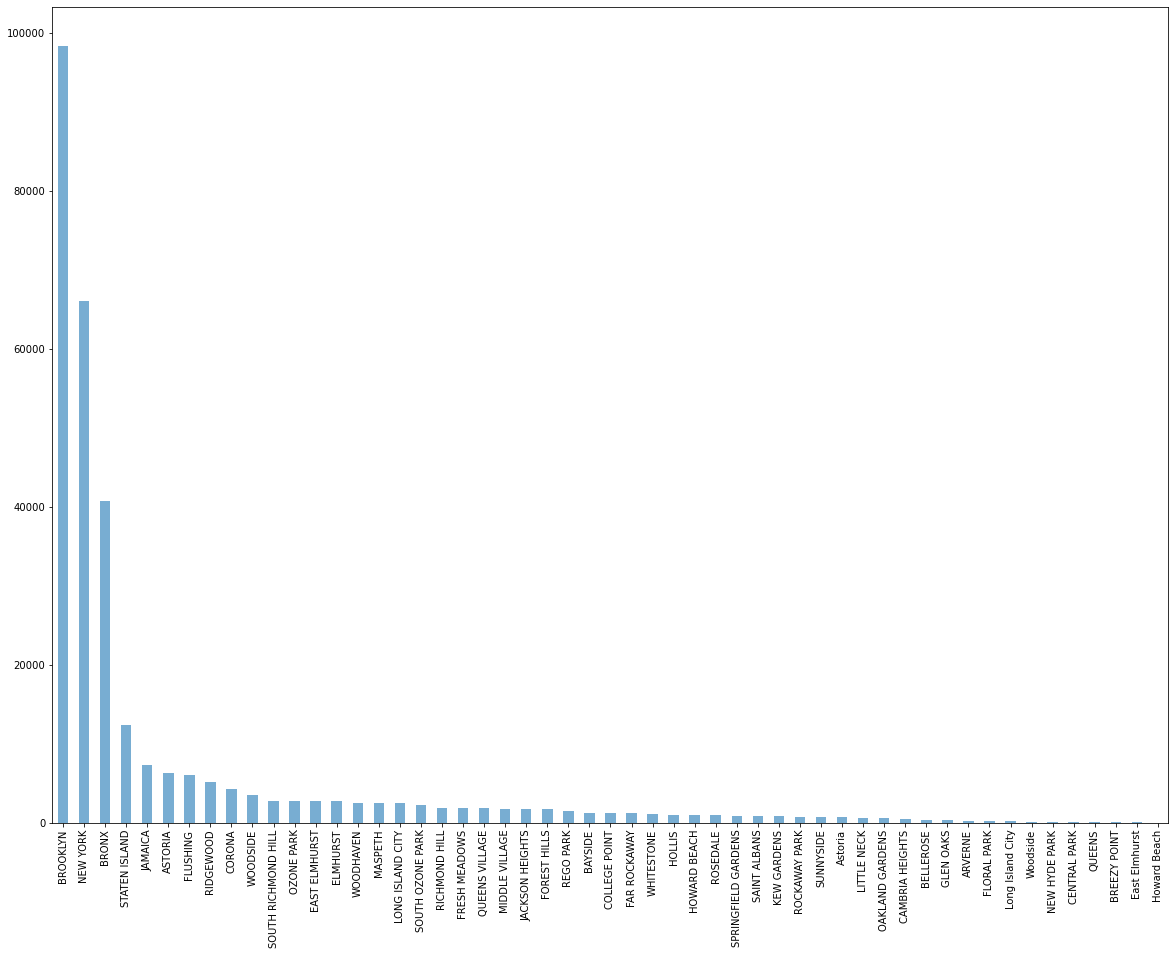

In [47]:
data["City"].value_counts().plot(kind="bar",figsize=(20,15),alpha=0.6)
plt.show()

In [48]:
grp_complaint = data.groupby("Complaint Type")

In [49]:
grp_data = grp_complaint.get_group("Blocked Driveway")
grp_data.shape

(77044, 54)

In [50]:
grp_data["City"].isnull().sum()

283

In [53]:
grp_data["City"].fillna("Unknown City")

1                 ASTORIA
2                   BRONX
7                   BRONX
9                BROOKLYN
10        JACKSON HEIGHTS
               ...       
300665           BROOKLYN
300672           BROOKLYN
300679          RIDGEWOOD
300687          RIDGEWOOD
300694      RICHMOND HILL
Name: City, Length: 77044, dtype: object

In [54]:
grp_data["City"].isnull().sum()

0

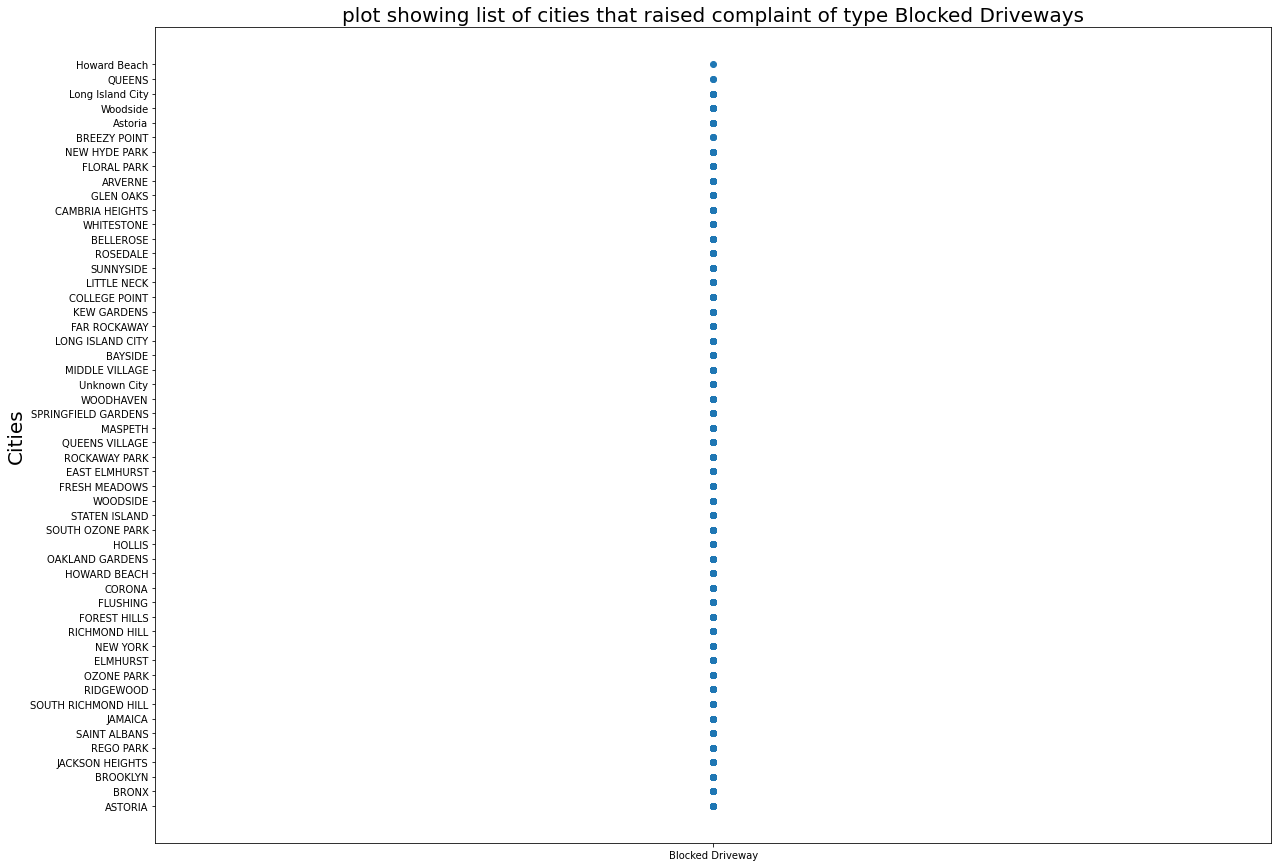

In [56]:
plt.figure(figsize=(20,15))
plt.scatter(grp_data["Complaint Type"],grp_data['City'])
plt.title("plot showing list of cities that raised complaint of type Blocked Driveways",size=20)
plt.ylabel("Cities",size=20)
plt.show()

Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [61]:
sort_data = grp_data.sort_values(by="Request_Closing_Time")

In [76]:
df1 = sort_data.groupby("Location Type")

In [84]:
df1[["Complaint Type","Location Type","Request_Closing_Time","City"]].head()

,Complaint Type,Location Type,Request_Closing_Time,City
27880,Blocked Driveway,Street/Sidewalk,-7 days +19:43:00,BRONX
27767,Blocked Driveway,Street/Sidewalk,-7 days +21:46:00,BRONX
27629,Blocked Driveway,Street/Sidewalk,-6 days +02:44:00,BRONX
27360,Blocked Driveway,Street/Sidewalk,-6 days +09:24:00,BRONX
26647,Blocked Driveway,Street/Sidewalk,-6 days +22:22:00,BRONX
176148,Blocked Driveway,NaN,-1 days +11:01:52,BROOKLYN
176128,Blocked Driveway,NaN,-1 days +13:43:29,BRONX
176122,Blocked Driveway,NaN,-1 days +14:10:42,BROOKLYN
176332,Blocked Driveway,NaN,-1 days +15:44:35,COLLEGE POINT
176328,Blocked Driveway,NaN,-1 days +15:47:44,BROOKLYN


Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)

Are the type of complaint or service requested and location related?



In [92]:
import scipy.stats as stats

In [130]:
data["Location Type"]=data["Location Type"].fillna("Unknown Location")
data["Location Type"].isnull().sum()

0

In [143]:
dataset_table = pd.crosstab(data["Complaint Type"],data["Location Type"])

In [144]:
Observed_Data = dataset_table.values
print("Observed Values:-\n", Observed_Data)

Observed Values:-
 [[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     6     0]
 [    0     0    62     0     0    93     0     0   123   110   227  5085
      0   522  1531    22     0     3     0]
 [    0     0     0     0     0     0     0     1     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0    26
      0    53   348     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0 77007     0     0    37     0]
 [    0     0     0     0    14     0     0     0     0     0     0     0
      5     0 17614     0     0     8    77]
 [    0     0     0     0     0     0     0     0     0     0     0    77
      0     8   201     0     0     0     0]
 [    0   366     0     0     0     0     0     0    98     0     0   291
      0    90   434     0     0     1     0]
 [    0     0     0     1    

In [145]:
Observed_Data.shape

(24, 19)

In [146]:
val = stats.chi2_contingency(dataset_table)

In [138]:
val

(1652072.540954126,
 0.0,
 414,
 array([[3.99071494e-05, 3.46394056e-01, 1.23712163e-03, 1.99535747e-05,
         4.29001856e-03, 1.85568245e-03, 1.85368709e-02, 1.99535747e-05,
         9.52384120e-02, 2.33456824e-03, 4.52946145e-03, 1.38876880e-01,
         6.98375114e-04, 4.06673806e-01, 4.97440621e+00, 6.78421539e-04,
         1.99535747e-05, 2.61391828e-03, 1.53642525e-03],
        [5.17329680e-02, 4.49042162e+02, 1.60372201e+00, 2.58664840e-02,
         5.56129406e+00, 2.40558301e+00, 2.40299636e+01, 2.58664840e-02,
         1.23460728e+02, 3.02637863e+00, 5.87169186e+00, 1.80030729e+02,
         9.05326939e-01, 5.27184810e+02, 6.44848859e+03, 8.79460455e-01,
         2.58664840e-02, 3.38850940e+00, 1.99171927e+00],
        [6.65119156e-06, 5.77323427e-02, 2.06186938e-04, 3.32559578e-06,
         7.15003093e-04, 3.09280408e-04, 3.08947848e-03, 3.32559578e-06,
         1.58730687e-02, 3.89094706e-04, 7.54910242e-04, 2.31461466e-02,
         1.16395852e-04, 6.77789676e-02, 8.290677

In [142]:
val[1] < 0.05

True